# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [32]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 
from IPython.display import display
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [33]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")
display(chipo.head())
display(chipo.info())
display(chipo.describe())

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


None

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### Step 4. See the first 10 entries

In [34]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

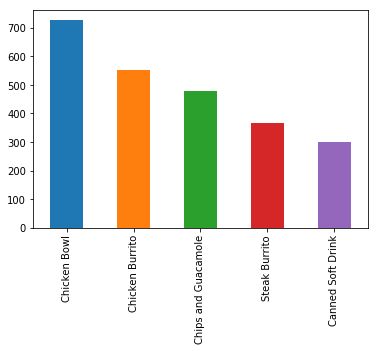

In [35]:
chipo.item_name.value_counts()[:5].plot.bar()

Text(0.5,1,"Most ordered Chipotle's Items'")

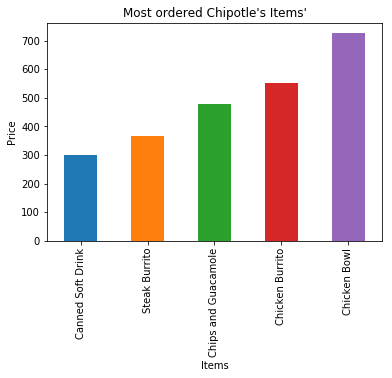

In [36]:
x = chipo.item_name

letter_counts = collections.Counter(x)

df = pd.DataFrame.from_dict(letter_counts, orient="index")

df = df[0].sort_values(ascending=True)[45:50]

df.plot(kind="bar")

plt.xlabel("Items")
plt.ylabel("Price")
plt.title("Most ordered Chipotle's Items'")

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [37]:
chipo["item_price"] = chipo.item_price.apply(lambda x : float(x[1:]))

In [38]:
x = chipo[["order_id", "item_price"]].groupby("order_id").agg(["count", "sum"])
display(x)
display(x.columns)

item_price       
              count    sum
order_id                  
1                 4  11.56
2                 1  16.98
3                 2  12.67
4                 2  21.00
5                 2  13.70
6                 2  17.50
7                 2  15.70
8                 2  10.88
9                 2  10.67
10                2  13.20
11                2  12.38
12                2  14.37
13                2  10.88
14                2  10.08
15                2  10.88
16                2  10.68
17                2  10.08
18                4  24.90
19                2  13.90
20                4  36.20
21                3  23.36
22                2  12.98
23                2  11.17
24                2  12.07
25                2  11.38
26                2  20.50
27                2  13.90
28                4  33.70
29                2  17.98
30                3  23.36
...             ...    ...
1805              2  20.00
1806              4  13.00
1807              2  18.64
1808              2  13.70
1809              3  14.45
1810              2  23.00
1811              3  29.25
1812              3  22.50
1813              1  17.50
1814              2  13.70
1815              2  12.50
1816              2  13.20
1817              4  13.00
1818              2  18.14
1819              2  13.20
1820              2  12.50
1821              2  13.70
1822              3  23.00
1823              3  12.15
1824              3  26.95
1825              6  66.50
1826              4  15.95
1827              5  32.95
1828              3  14.45
1829              3  24.25
1830              2  23.00
1831              3  12.90
1832              2  13.20
1833              2  23.50
1834              3  28.75

[1834 rows x 2 columns]

MultiIndex(levels=[['item_price'], ['count', 'sum']],
           labels=[[0, 0], [0, 1]])

In [39]:
x.columns = x.columns.levels[1]

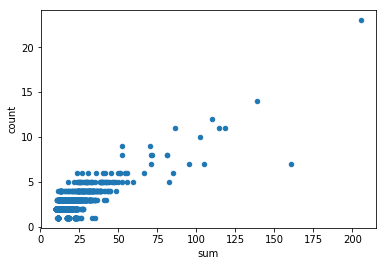

In [40]:
x.plot.scatter(x="sum", y="count")

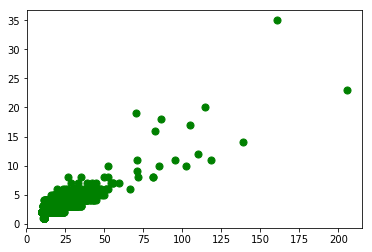

In [42]:
orders = chipo.groupby("order_id").sum()
plt.scatter(x = orders.item_price, y=orders.quantity, s=50, c="green")

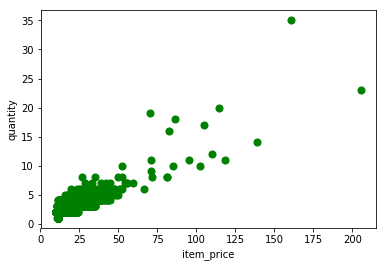

In [48]:
orders.plot.scatter(x="item_price", y="quantity", s=50, c="green", marker='o')

### Step 7. BONUS: Create a question and a graph to answer your own question.